In [79]:
import pandas as pd
import numpy as np

In [80]:
import warnings
warnings.filterwarnings('ignore')

In [81]:
data_path = '../data/tip.csv'

In [82]:
data_path

'../data/tip.csv'

In [83]:
df = pd.read_csv(data_path)

In [84]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [85]:
df.shape

(244, 7)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [87]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [88]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: ylabel='Count'>

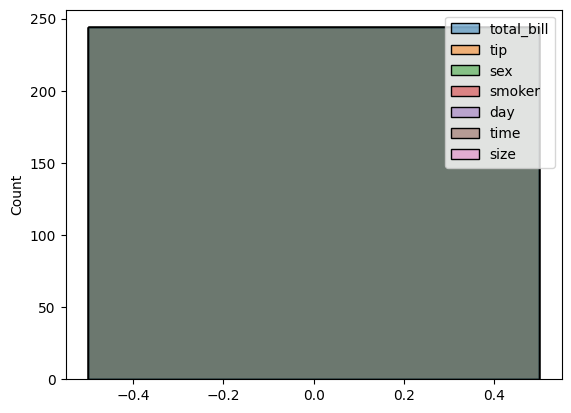

In [90]:
sns.histplot(df.isnull())

In [91]:
def separate_columns(df:pd.DataFrame)->tuple[list[str],list[str]]:
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    categorical_columns = df.select_dtypes(exclude=['number']).columns.tolist()
    return numeric_cols,categorical_columns

In [92]:
numeric_cols, categorical_cols = separate_columns(df)

In [93]:
numeric_cols

['total_bill', 'tip', 'size']

In [94]:
categorical_cols

['sex', 'smoker', 'day', 'time']

In [95]:
def plot_three_histograms(cols: list) -> None:
    """Plot 3 numeric columns side-by-side as histograms."""
    rows = len(cols) // 3 if len(cols) % 3 == 0 else (len(cols) // 3) + 1
        
    fig, axes = plt.subplots(rows, 3, figsize=(18, 5*rows))
    
    for i, col in enumerate(cols):
        sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue', edgecolor='black')
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True)

    plt.tight_layout()
    plt.show()

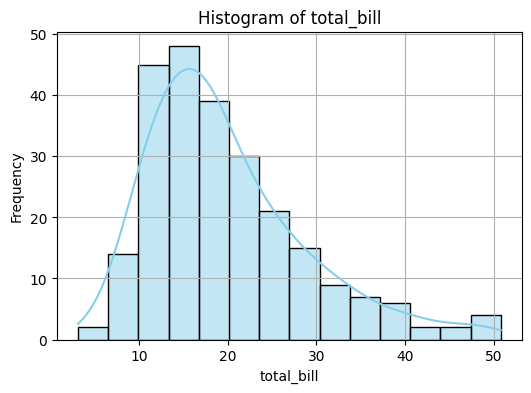

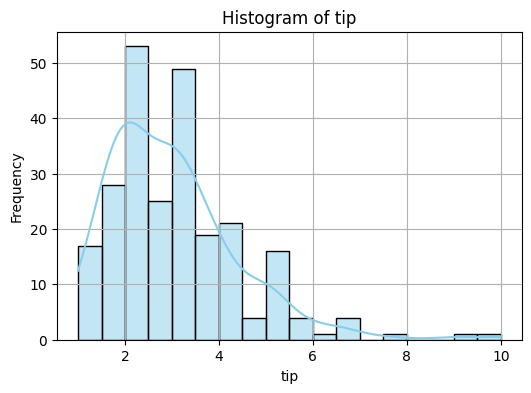

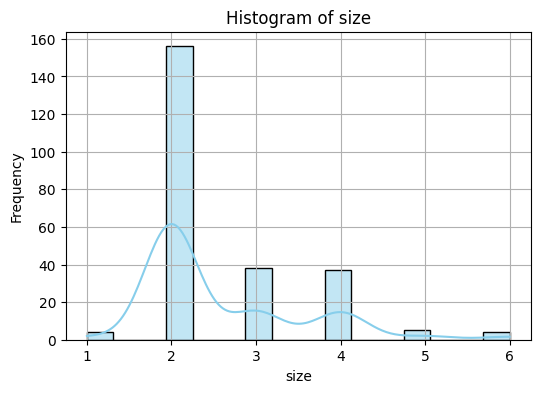

In [96]:
plot_numeric_histograms(numeric_cols)

## Transforming  the Data

In [97]:
from sklearn.preprocessing import LabelEncoder

In [98]:
le = LabelEncoder()

In [99]:
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
    
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"\nColumn: {col}")
    print(mapping)


Column: sex
{'Female': 0, 'Male': 1}

Column: smoker
{'No': 0, 'Yes': 1}

Column: day
{'Fri': 0, 'Sat': 1, 'Sun': 2, 'Thur': 3}

Column: time
{'Dinner': 0, 'Lunch': 1}


In [106]:
import joblib
joblib.dump(le,'src/models/label_encoded.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'src/models/label_encoded.pkl'

In [100]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2


## Visualizing the Data

In [103]:
corr_matrix = df.corr()

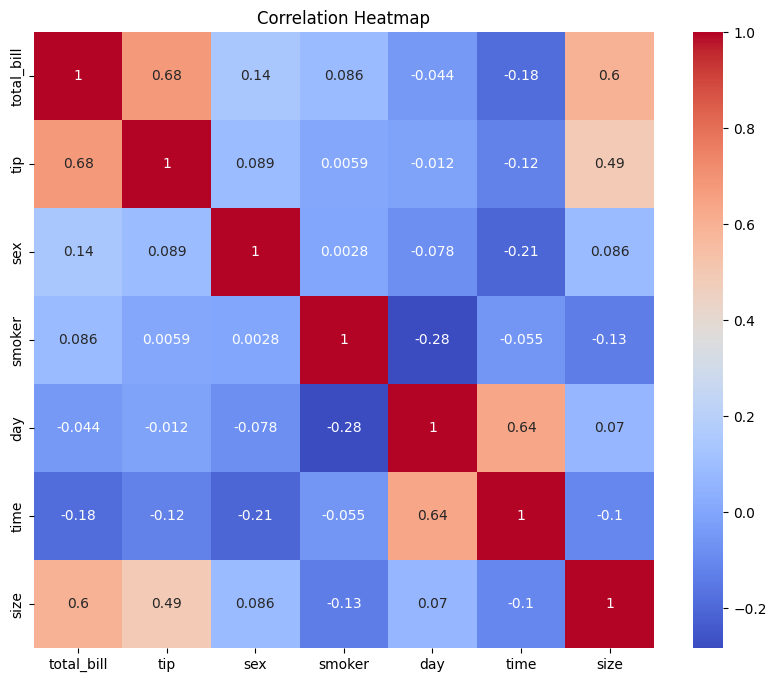

In [104]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()